# Домашнее задание: оценка качества моделей классификации.

Будем тренироваться интерпретировать качество моделей классификации.

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задача: датасет о кредитном скоринге - 2. 
* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [226]:
df = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/ML_2021_january/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%205/credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [227]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [228]:
#your code here
df["target"].value_counts()

0    382
1    307
Name: target, dtype: int64

Классы не сбалансированы

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [229]:
#1-й алгоритм
accuracy_score(df['target'], df['pred1_classes'])

0.6618287373004355

In [230]:
#2-й алгоритм
accuracy_score(df['target'], df['pred2_classes'])

0.6719883889695211

In [231]:
#3-й алгоритм
accuracy_score(df['target'], df['pred3_classes'])

0.6400580551523948

2-й алгоритм имеет наибольшую долю правильных ответов(accuracy)

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [232]:
#1-й алгоритм
precision_1 = precision_score(df['target'], df['pred1_classes'])
recall_1 = recall_score(df['target'], df['pred1_classes'])
print(precision_1)
print(recall_1)

0.6907216494845361
0.4364820846905538


In [233]:
#1-й алгоритм
precision_2 = precision_score(df['target'], df['pred2_classes'])
recall_2 = recall_score(df['target'], df['pred2_classes'])
print(precision_2)
print(recall_2)

0.6103542234332425
0.7296416938110749


In [234]:
#1-й алгоритм
precision_3 = precision_score(df['target'], df['pred3_classes'])
recall_3 = recall_score(df['target'], df['pred3_classes'])
print(precision_3)
print(recall_3)

0.6903225806451613
0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок из семинара, нарисуйте матрицы ошибок всех трех алгоритмов.

In [235]:
#your code here
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

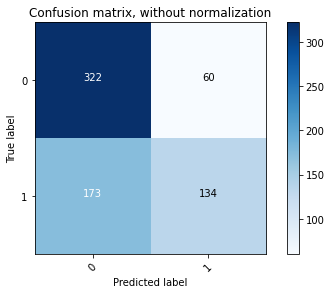

In [236]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')

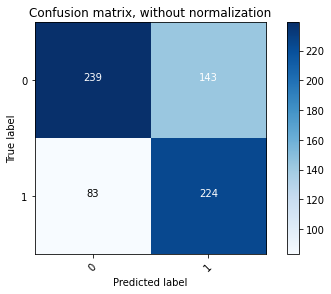

In [237]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')

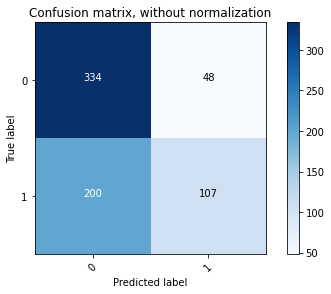

In [238]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred3_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [239]:
#your code here
#1-й алгоритм
threshold_list = []
accuracy_list = []
recall_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred1_probs'] > i) >= 0.65:
        #print(i)
        threshold_list.append(i)
        accuracy_1 = accuracy_score(df['target'], df['pred1_probs'] > i)
        #print(accuracy_1)
        accuracy_list.append(accuracy_1)
        recall_1 = recall_score(df['target'], df['pred1_probs'] > i)
        #print(recall_1)
        recall_list.append(recall_1)
        confusion_matrix_1 = confusion_matrix(df['target'], df['pred1_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list.append(confusion_matrix_1)

max_recall_index = recall_list.index(max(recall_list))
print('1-й алгоритм')
print('Threshold =', threshold_list[max_recall_index])
print('Accuracy', accuracy_list[max_recall_index])
print('Recall =', recall_list[max_recall_index])
print(confusion_matrix_list[max_recall_index])

1-й алгоритм
Threshold = 0.36000000000000004
Accuracy 0.6516690856313497
Recall = 0.742671009771987
[[221 161]
 [ 79 228]]


In [240]:
#your code here
#2-й алгоритм
threshold_list_2 = []
accuracy_list_2 = []
recall_list_2 = []
confusion_matrix_list_2 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred2_probs'] > i) >= 0.65:
        threshold_list_2.append(i)
        accuracy_2 = accuracy_score(df['target'], df['pred2_probs'] > i)
        accuracy_list_2.append(accuracy_2)
        recall_2 = recall_score(df['target'], df['pred2_probs'] > i)
        recall_list_2.append(recall_2)
        confusion_matrix_2 = confusion_matrix(df['target'], df['pred2_probs'] >i)
        confusion_matrix_list_2.append(confusion_matrix_2)

max_recall_index_2 = recall_list_2.index(max(recall_list_2))
print('2-й алгоритм')
print('Threshold =', threshold_list_2[max_recall_index_2])
print('Accuracy', accuracy_list_2[max_recall_index_2])
print('Recall =', recall_list_2[max_recall_index_2])
print(confusion_matrix_list_2[max_recall_index_2])

2-й алгоритм
Threshold = 0.27
Accuracy 0.6748911465892597
Recall = 0.8371335504885994
[[208 174]
 [ 50 257]]


In [241]:
#your code here
#3-й алгоритм
threshold_list_3 = []
accuracy_list_3 = []
recall_list_3 = []
confusion_matrix_list_3 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred3_probs'] > i) >= 0.645:
        threshold_list_3.append(i)
        accuracy_3 = accuracy_score(df['target'], df['pred3_probs'] > i)
        accuracy_list_3.append(accuracy_3)
        recall_3 = recall_score(df['target'], df['pred3_probs'] > i)
        recall_list_3.append(recall_3)
        confusion_matrix_3 = confusion_matrix(df['target'], df['pred3_probs'] >i)
        confusion_matrix_list_3.append(confusion_matrix_3)

max_recall_index_3 = recall_list_3.index(max(recall_list_3))
print('3-й алгоритм')
print('Threshold =', threshold_list_3[max_recall_index_3])
print('Accuracy', accuracy_list_3[max_recall_index_3])
print('Recall =', recall_list_3[max_recall_index_3])
print(confusion_matrix_list_3[max_recall_index_3])

3-й алгоритм
Threshold = 0.26
Accuracy 0.6458635703918723
Recall = 0.6091205211726385
[[258 124]
 [120 187]]


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

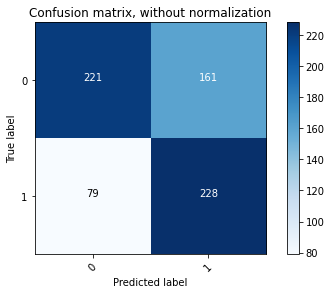

In [242]:
#your code here
#1-й алгоритм
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_probs'] > 0.36), classes=['0','1'],
                        title='Confusion matrix, without normalization')

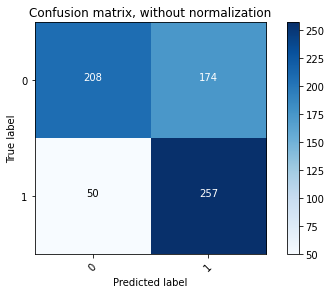

In [243]:
#your code here
#2-й алгоритм
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_probs'] > 0.27), classes=['0','1'],
                        title='Confusion matrix, without normalization')

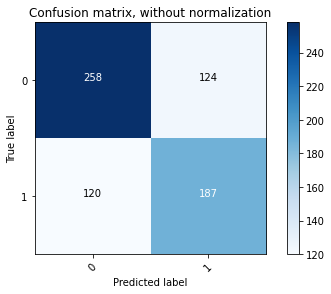

In [244]:
#3-й алгоритм
plot_confusion_matrix(confusion_matrix(df['target'], df['pred3_probs'] > 0.26), classes=['0','1'],
                        title='Confusion matrix, without normalization')

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Вторая модель лучше справилась с задачей. Полнота больше, чем у первой

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [245]:
#1-й алгоритм
threshold_list = []
accuracy_list = []
precision_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred1_probs'] > i) >= 0.65:
        #print(i)
        threshold_list.append(i)
        accuracy_1 = accuracy_score(df['target'], df['pred1_probs'] > i)
        #print(accuracy_1)
        accuracy_list.append(accuracy_1)
        precision_1 = precision_score(df['target'], df['pred1_probs'] > i)
        #print(precision_1)
        precision_list.append(precision_1)
        confusion_matrix_1 = confusion_matrix(df['target'], df['pred1_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list.append(confusion_matrix_1)

max_precision_index = precision_list.index(max(precision_list))
print('1-й алгоритм')
print('Threshold =', threshold_list[max_precision_index])
print('Accuracy =', accuracy_list[max_precision_index])
print('Precision =', precision_list[max_precision_index])
print(confusion_matrix_list[max_precision_index])

1-й алгоритм
Threshold = 0.54
Accuracy = 0.6618287373004355
Precision = 0.7371794871794872
[[341  41]
 [192 115]]


In [246]:
#2-й алгоритм
threshold_list_2 = []
accuracy_list_2 = []
precision_list_2 = []
confusion_matrix_list_2 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred2_probs'] > i) >= 0.65:
        #print(i)
        threshold_list_2.append(i)
        accuracy_2 = accuracy_score(df['target'], df['pred2_probs'] > i)
        #print(accuracy_1)
        accuracy_list_2.append(accuracy_2)
        precision_2 = precision_score(df['target'], df['pred2_probs'] > i)
        #print(precision_1)
        precision_list_2.append(precision_2)
        confusion_matrix_2 = confusion_matrix(df['target'], df['pred2_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list_2.append(confusion_matrix_2)

max_precision_index_2 = precision_list_2.index(max(precision_list_2))
print('2-й алгоритм')
print('Threshold =', threshold_list_2[max_precision_index_2])
print('Accuracy =', accuracy_list_2[max_precision_index_2])
print('Precision =', precision_list_2[max_precision_index_2])
print(confusion_matrix_list_2[max_precision_index_2])

2-й алгоритм
Threshold = 0.73
Accuracy = 0.6502177068214804
Precision = 0.8367346938775511
[[366  16]
 [225  82]]


In [247]:
#3-й алгоритм
threshold_list_3 = []
accuracy_list_3 = []
precision_list_3 = []
confusion_matrix_list_3 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred3_probs'] > i) >= 0.64:
        #print(i)
        threshold_list_3.append(i)
        accuracy_3 = accuracy_score(df['target'], df['pred3_probs'] > i)
        #print(accuracy_1)
        accuracy_list_3.append(accuracy_3)
        precision_3 = precision_score(df['target'], df['pred3_probs'] > i)
        #print(precision_1)
        precision_list_3.append(precision_3)
        confusion_matrix_3 = confusion_matrix(df['target'], df['pred3_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list_3.append(confusion_matrix_3)

max_precision_index_3 = precision_list_3.index(max(precision_list_3))
print('3-й алгоритм')
print('Threshold =', threshold_list_3[max_precision_index_3])
print('Accuracy =', accuracy_list_3[max_precision_index_3])
print('Precision =', precision_list_3[max_precision_index_3])
print(confusion_matrix_list_3[max_precision_index_3])

3-й алгоритм
Threshold = 0.56
Accuracy = 0.6415094339622641
Precision = 0.7142857142857143
[[342  40]
 [207 100]]


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

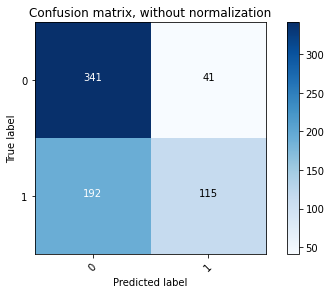

In [248]:
#your code here
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_probs'] > 0.54), classes=['0','1'],
                        title='Confusion matrix, without normalization')

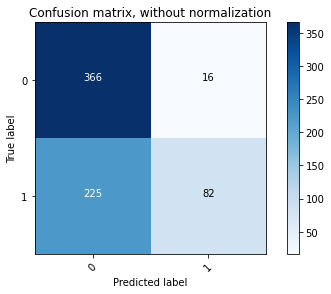

In [249]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_probs'] > 0.73), classes=['0','1'],
                        title='Confusion matrix, without normalization')

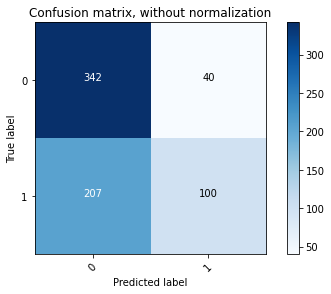

In [250]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred3_probs'] > 0.56), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [252]:
#your code here
#1-й алгоритм
threshold_list = []
f1_list = []
accuracy_list = []
recall_list = []
precision_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred1_probs'] > i) >= 0.65:
        #print(i)
        threshold_list.append(i)
        f1_1 = f1_score(df['target'], df['pred1_probs'] > i)
        f1_list.append(f1_1)
        accuracy_1 = accuracy_score(df['target'], df['pred1_probs'] > i)
        #print(accuracy_1)
        accuracy_list.append(accuracy_1)
        recall_1 = recall_score(df['target'], df['pred1_probs'] > i)
        #print(recall_1)
        recall_list.append(recall_1)
        precision_1 = precision_score(df['target'], df['pred1_probs'] > i)
        #print(precision_1)
        precision_list.append(precision_1)
        confusion_matrix_1 = confusion_matrix(df['target'], df['pred1_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list.append(confusion_matrix_1)

max_f1_index = f1_list.index(max(f1_list))
print('1-й алгоритм')
print('Threshold =', threshold_list[max_f1_index])
print('F1 =', f1_list[max_f1_index])
print('Accuracy =', accuracy_list[max_f1_index])
print('Recall =', recall_list[max_f1_index])
print('Precision =', precision_list[max_f1_index])
print(confusion_matrix_list[max_f1_index])

1-й алгоритм
Threshold = 0.36000000000000004
F1 = 0.6551724137931035
Accuracy = 0.6516690856313497
Recall = 0.742671009771987
Precision = 0.5861182519280206
[[221 161]
 [ 79 228]]


In [253]:
#your code here
#2-й алгоритм
threshold_list_2 = []
f1_list_2 = []
accuracy_list_2 = []
recall_list_2 = []
precision_list_2 = []
confusion_matrix_list_2 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred2_probs'] > i) >= 0.65:
        #print(i)
        threshold_list_2.append(i)
        f1_2 = f1_score(df['target'], df['pred2_probs'] > i)
        f1_list_2.append(f1_2)
        accuracy_2 = accuracy_score(df['target'], df['pred2_probs'] > i)
        #print(accuracy_1)
        accuracy_list_2.append(accuracy_2)
        recall_2 = recall_score(df['target'], df['pred2_probs'] > i)
        #print(recall_1)
        recall_list_2.append(recall_2)
        precision_2 = precision_score(df['target'], df['pred2_probs'] > i)
        #print(precision_1)
        precision_list_2.append(precision_2)
        confusion_matrix_2 = confusion_matrix(df['target'], df['pred2_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list_2.append(confusion_matrix_2)

max_f1_index_2 = f1_list_2.index(max(f1_list_2))
print('2-й алгоритм')
print('Threshold =', threshold_list_2[max_f1_index_2])
print('F1 =', f1_list_2[max_f1_index_2])
print('Accuracy =', accuracy_list_2[max_f1_index_2])
print('Recall =', recall_list_2[max_f1_index_2])
print('Precision =', precision_list_2[max_f1_index_2])
print(confusion_matrix_list_2[max_f1_index_2])

2-й алгоритм
Threshold = 0.32
F1 = 0.6990291262135923
Accuracy = 0.6850507982583455
Recall = 0.8208469055374593
Precision = 0.6086956521739131
[[220 162]
 [ 55 252]]


In [254]:
#your code here
#3-й алгоритм
threshold_list_3 = []
f1_list_3 = []
accuracy_list_3 = []
recall_list_3 = []
precision_list_3 = []
confusion_matrix_list_3 = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(df['target'], df['pred3_probs'] > i) >= 0.645:
        #print(i)
        threshold_list_3.append(i)
        f1_3 = f1_score(df['target'], df['pred3_probs'] > i)
        f1_list_3.append(f1_3)
        accuracy_3 = accuracy_score(df['target'], df['pred3_probs'] > i)
        #print(accuracy_1)
        accuracy_list_3.append(accuracy_3)
        recall_3 = recall_score(df['target'], df['pred3_probs'] > i)
        #print(recall_1)
        recall_list_3.append(recall_3)
        precision_3 = precision_score(df['target'], df['pred3_probs'] > i)
        #print(precision_1)
        precision_list_3.append(precision_3)
        confusion_matrix_3 = confusion_matrix(df['target'], df['pred3_probs'] >i)
        #print(confusion_matrix_1)
        confusion_matrix_list_3.append(confusion_matrix_3)

max_f1_index_3 = f1_list_3.index(max(f1_list_3))
print('3-й алгоритм')
print('Threshold =', threshold_list_3[max_f1_index_3])
print('F1 =', f1_list_3[max_f1_index_3])
print('Accuracy =', accuracy_list_3[max_f1_index_3])
print('Recall =', recall_list_3[max_f1_index_3])
print('Precision =', precision_list_3[max_f1_index_3])
print(confusion_matrix_list_3[max_f1_index_3])

3-й алгоритм
Threshold = 0.26
F1 = 0.6051779935275081
Accuracy = 0.6458635703918723
Recall = 0.6091205211726385
Precision = 0.6012861736334405
[[258 124]
 [120 187]]


### Вывод

2-ой алгоритм решает лучше всех поставленную задачу. Его значения F1, accuracy и recall больше, чем у 1-го и 3-го алгоритмов.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [255]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите линейную регрессию предсказывать target.

In [256]:
#your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [257]:
X = df[df.columns[:-7]]
y = df["target"]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [259]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [260]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [261]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 7.46316203e-01  9.14446800e-01  7.38362254e-01 -8.57033976e-02
  4.93914432e-01  8.61421644e-01  1.92699504e-01  7.10284519e-01
  9.04054074e-01  7.38775805e-01  6.30890624e-01 -6.40248005e-02
  7.36356297e-01  1.18715848e-01 -4.29198771e-02 -1.57807552e-01
 -3.25981544e-02  2.45588302e-01  7.41483347e-01  8.81024500e-01
  6.54972635e-01  7.50845743e-01  8.49890860e-01 -9.40835580e-03
  9.17322578e-01  9.20474602e-02 -7.69699170e-02  6.54525132e-01
  7.48649052e-01  1.36938286e-01  7.41573859e-02  1.24171080e-02
  7.07243678e-01  6.79341949e-02  8.39455723e-01  1.09793000e+00
  6.49186768e-02 -1.07497477e-01  6.97935176e-01  8.97806882e-01
  8.89648588e-01  2.00010636e-01  6.06969245e-01  7.35824014e-01
  7.99409058e-02  4.28042986e-02  6.81931857e-01  1.03240501e+00
  6.37120862e-01  8.76225508e-01  8.87263202e-01  1.03795980e+00
  7.04681309e-01  9.87960878e-01  5.90669774e-02  9.77869758e-01
  6.10761583e-01  9.45702186e-01  9.14023511e-01  8.64562069e-01
  3.50513721e-02  1.11229

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли линейная регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [262]:
threshold_list = []
f1_list = []
accuracy_list = []
recall_list = []
precision_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(y_test, y_pred > i) >= 0.65:
        threshold_list.append(i)
        f1 = f1_score(y_test, y_pred > i)
        f1_list.append(f1)
        accuracy = accuracy_score(y_test, y_pred > i)
        accuracy_list.append(accuracy)
        recall = recall_score(y_test, y_pred > i)
        recall_list.append(recall)
        precision = precision_score(y_test, y_pred > i)
        precision_list.append(precision)
        cfm = confusion_matrix(y_test, y_pred > i)
        confusion_matrix_list.append(cfm)

max_f1_index = f1_list.index(max(f1_list))
print('Линейная регрессия')
print('Threshold =', threshold_list[max_f1_index])
print('F1 =', f1_list[max_f1_index])
print('Accuracy =', accuracy_list[max_f1_index])
print('Recall =', recall_list[max_f1_index])
print('Precision =', precision_list[max_f1_index])
print(confusion_matrix_list[max_f1_index])

Линейная регрессия
Threshold = 0.68
F1 = 0.8541666666666667
Accuracy = 0.8647342995169082
Recall = 0.8723404255319149
Precision = 0.8367346938775511
[[97 16]
 [12 82]]


In [263]:
threshold_list = []
f1_list = []
accuracy_list = []
recall_list = []
precision_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(y_test, y_pred > i) >= 0.65:
        threshold_list.append(i)
        f1 = f1_score(y_test, y_pred > i)
        f1_list.append(f1)
        accuracy = accuracy_score(y_test, y_pred > i)
        accuracy_list.append(accuracy)
        recall = recall_score(y_test, y_pred > i)
        recall_list.append(recall)
        precision = precision_score(y_test, y_pred > i)
        precision_list.append(precision)
        cfm = confusion_matrix(y_test, y_pred > i)
        confusion_matrix_list.append(cfm)

max_recall_index = recall_list.index(max(recall_list))
print('Линейная регрессия')
print('Threshold =', threshold_list[max_recall_index])
print('F1 =', f1_list[max_recall_index])
print('Accuracy =', accuracy_list[max_recall_index])
print('Recall =', recall_list[max_recall_index])
print('Precision =', precision_list[max_recall_index])
print(confusion_matrix_list[max_recall_index])

Линейная регрессия
Threshold = 0.05
F1 = 0.7315175097276264
Accuracy = 0.6666666666666666
Recall = 1.0
Precision = 0.5766871165644172
[[44 69]
 [ 0 94]]


In [264]:
threshold_list = []
f1_list = []
accuracy_list = []
recall_list = []
precision_list = []
confusion_matrix_list = []
for i in np.linspace(0.01, 1.0, 100):
    if accuracy_score(y_test, y_pred > i) >= 0.65:
        threshold_list.append(i)
        f1 = f1_score(y_test, y_pred > i)
        f1_list.append(f1)
        accuracy = accuracy_score(y_test, y_pred > i)
        accuracy_list.append(accuracy)
        recall = recall_score(y_test, y_pred > i)
        recall_list.append(recall)
        precision = precision_score(y_test, y_pred > i)
        precision_list.append(precision)
        cfm = confusion_matrix(y_test, y_pred > i)
        confusion_matrix_list.append(cfm)

max_precision_index = precision_list.index(max(precision_list))
print('Линейная регрессия')
print('Threshold =', threshold_list[max_precision_index])
print('F1 =', f1_list[max_precision_index])
print('Accuracy =', accuracy_list[max_precision_index])
print('Recall =', recall_list[max_precision_index])
print('Precision =', precision_list[max_precision_index])
print(confusion_matrix_list[max_precision_index])

Линейная регрессия
Threshold = 0.89
F1 = 0.5079365079365079
Accuracy = 0.7004830917874396
Recall = 0.3404255319148936
Precision = 1.0
[[113   0]
 [ 62  32]]


### Вывод

Линейная регрессия справилась лучше, чем три готовые модели. Если максимизировать f1 , то мы получаем точность и полноту выше, чем у второй модели из задания, у которой были наилучшие показатели полноты и точности из 3х моделей